In [20]:
!python -m spacy download en_core_web_sm
import os
import spacy
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__CWDIR__ = pathlib.Path.cwd()
local_cache_dir = __CWDIR__.parent.parent.joinpath('local_cache_data')

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [97]:
def loadDataHandler(path:str, use_col=None):
    rdata = None
    if use_col and isinstance(use_col, list):
        rdata = pd.read_csv(path, usecols=use_col)
    elif not use_col:
        rdata = pd.read_csv(path)
    return rdata

def barChartsPlot(dict_, title=None):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    type_ = list(dict_.keys())
    values_ = list(dict_.values())
    ax.bar(type_,values_)
    plt.title(title)
    return plt

sample_data_1 = local_cache_dir.joinpath('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
sample_data_2 = local_cache_dir.joinpath('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
filter_col = ['reviews.title', 'reviews.text', 'reviews.rating', 'categories', 'primaryCategories']
# filter_col = None
data_1 = loadDataHandler(sample_data_1, use_col=filter_col)
data_2 = loadDataHandler(sample_data_2, use_col=filter_col)
data = pd.concat([data_1, data_2], axis=0).reset_index(drop=True)

In [98]:
def ratingRelabel(series:pd.Series):
    empty_np = np.zeros(len(series), dtype='<U3')
    for idx, i in enumerate(data['reviews.rating']):
        if i > 3: empty_np[idx] = 'pos'
        elif i == 3: empty_np[idx] = 'neu'
        else: empty_np[idx] = 'neg'
    return empty_np

rating_np = ratingRelabel(data['reviews.rating'])
data = pd.DataFrame(np.column_stack([data, rating_np]))
data.columns = ['categories', 'primary_categories', 'reviews_rating', 'reviews_text', 'reviews_title', 'pos/neg']
data 


,categories,primary_categories,reviews_rating,reviews_text,reviews_title,pos/neg
0,"Computers,Electronics Features,Tablets,Electro...",Electronics,3,I thought it would be as big as small paper bu...,Too small,neu
1,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,pos
2,"Computers,Electronics Features,Tablets,Electro...",Electronics,4,Didnt know how much i'd use a kindle so went f...,Great for the price,pos
3,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,I am 100 happy with my purchase. I caught it o...,A Great Buy,pos
4,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,pos
...,...,...,...,...,...,...
33327,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,pos
33328,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,pos
33329,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!,pos
33330,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,pos


{3: 1403, 5: 23375, 4: 6856, 1: 1028, 2: 670}


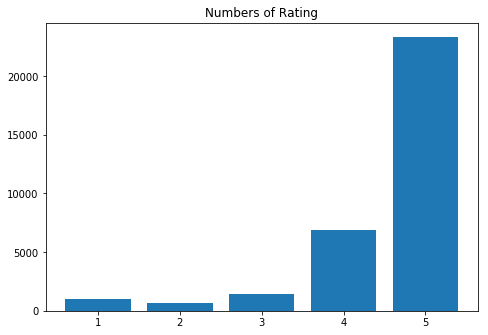

{'neu': 1403, 'pos': 30231, 'neg': 1698}


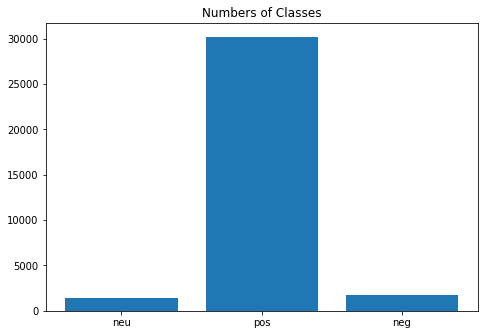

In [99]:
rating_dict = {}
for i in data['reviews_rating']:
    if i not in rating_dict:
        rating_dict[i] = 0
    rating_dict[i]+=1    
plt = barChartsPlot(rating_dict, title='Numbers of Rating')
print(rating_dict)
plt.show()

classes = {}
for i in data['pos/neg']:
    if i not in classes:
        classes[i] = 0
    classes[i]+=1    
plt = barChartsPlot(classes, title='Numbers of Classes')
print(classes)
plt.show()

In [265]:
pos_dataset = data.loc[data['pos/neg'] == 'pos']
neu_dataset = data.loc[data['pos/neg'] == 'neu']
neg_dataset = data.loc[data['pos/neg'] == 'neg']
print(f"pos:{len(pos_dataset)}, neu:{len(neu_dataset)}, neg:{len(neg_dataset)}")

pos_dataset = pos_dataset[:3000]
neu_dataset = neu_dataset[:1400]
neg_dataset = neg_dataset[:1600]
dataset = pd.concat([pos_dataset, neu_dataset, neg_dataset], axis=0).reset_index(drop=True)

pos:30231, neu:1403, neg:1698


In [266]:
dataset

,categories,primary_categories,reviews_rating,reviews_text,reviews_title,pos/neg
0,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,pos
1,"Computers,Electronics Features,Tablets,Electro...",Electronics,4,Didnt know how much i'd use a kindle so went f...,Great for the price,pos
2,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,I am 100 happy with my purchase. I caught it o...,A Great Buy,pos
3,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,pos
4,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,This make an excellent ebook reader. Don't exp...,Good ebook,pos
...,...,...,...,...,...,...
5995,"Computers,Fire Tablets,Electronics Features,Co...",Electronics,1,did not power up...at all. I am so happy that ...,send back,neg
5996,"Computers,Fire Tablets,Electronics Features,Co...",Electronics,2,"After owning the kids Samsung, this seems conf...",so so,neg
5997,"Computers,Fire Tablets,Electronics Features,Co...",Electronics,1,It takes forever to download apps. I'm returni...,Super slow,neg
5998,"Computers,Fire Tablets,Electronics Features,Co...",Electronics,1,"The touch and loading the content is very bad,...",The tablet not so great as mentioned,neg


In [91]:
nlp = spacy.load("en_core_web_sm")


Pipe names : ['tagger', 'parser', 'ner']


In [269]:
x = dataset['reviews_text'].to_list()
y = dataset['pos/neg'].to_list()

In [270]:
import re
from spacy.tokenizer import Tokenizer
from spacy.util import compile_prefix_regex, compile_infix_regex, compile_suffix_regex
from spacy.attrs import ORTH, NORM

from keras.preprocessing.text import Tokenizer as KerasTokenizer
from keras.preprocessing.sequence import pad_sequences

special_case = {
    "couldn't" : [{ORTH: "could"}, {ORTH: "n't", NORM: "not"}],
    "don't" : [{ORTH: "do"}, {ORTH: "n't", NORM: "not"}],
    "wasn't" : [{ORTH: "was"}, {ORTH: "n't", NORM: "not"}],
    "isn't" : [{ORTH: "is"}, {ORTH: "n't", NORM: "not"}],
    "it's" : [{ORTH: "it"}, {ORTH: "'s", NORM: "is"}],
    "wouldn't": [{ORTH: "would"}, {ORTH: "n't", NORM: "not"}],
}

class Parser:
    def __init__(self, sent_segmenter=True, custom_tokenize=True):
        self.pre_model = spacy.load("en_core_web_sm")
        
        if sent_segmenter:
            self.boundary = re.compile('^[0-9]$')
            self.pre_model.add_pipe(self.custom_seg, before='parser')
        
        if custom_tokenize:
            self.pre_model.tokenizer = self.custom_tokenizer(self.pre_model)
            
            for k,v in special_case.items():
                self.pre_model.tokenizer.add_special_case(k, v)
            
        print(f"Pipe names : {self.pre_model.pipe_names}")
    
    def custom_tokenizer(self, nlp_model):
        infix_re = re.compile(r'''[.\,\?\:\;\...\‘\’\`\“\”\"\'~]''')
        prefix_re = compile_prefix_regex(self.pre_model.Defaults.prefixes)
        suffix_re = compile_suffix_regex(self.pre_model.Defaults.suffixes)
        
        return Tokenizer(self.pre_model.vocab, prefix_search=prefix_re.search,
                                               suffix_search=suffix_re.search,
                                               infix_finditer=infix_re.finditer,
                                               token_match=None)

    def custom_seg(self, doc):
        prev = doc[0].text
        length = len(doc)
        for index, token in enumerate(doc):
            if (token.text == '.' and self.boundary.match(prev) and index!=(length - 1)):
                doc[index+1].sent_start = False
            prev = token.text
        return doc
    
    def sent_to_doc(self, sent):
        self.doc = self.pre_model(sent)
    
    def token_normalizer(self, token):
        if(token == "n't"):
            new_token = "not"
        else:
            new_token = token
        return new_token
    
    def remove_punct(self):
        if 'custom_seg' in self.pre_model.pipe_names:
            rlist = []
            for sent in (self.doc).sents:
                temp_ = []
                for token in sent:
                    if token.pos_ == 'PUNCT':
                        continue
                    new_token = self.token_normalizer(token.text)
                    temp_.append(new_token)
                rlist.append(temp_)
            return rlist

parser_obj = Parser(sent_segmenter=True)

X_list = []
for idx, review in enumerate(x):
    parser_obj.sent_to_doc(review)
    parsed_list = parser_obj.remove_punct()
    str_ = ""
    for idx_, list_ in enumerate(parsed_list):
        str_ += ' '.join(list_)
        str_ += ' '
    X_list.append(str_)
#     if idx == 100:
#         break
    

Pipe names : ['tagger', 'custom_seg', 'parser', 'ner']


In [271]:
X = X_list

In [278]:
tk = KerasTokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=200, padding='post')
tk.word_counts

OrderedDict([('this', 2529),
             ('kindle', 473),
             ('is', 3080),
             ('light', 203),
             ('and', 5481),
             ('easy', 594),
             ('to', 5795),
             ('use', 1104),
             ('especially', 48),
             ('at', 610),
             ('the', 8333),
             ('beach', 3),
             ('didnt', 23),
             ('know', 145),
             ('how', 228),
             ('much', 375),
             ('i', 6661),
             ('d', 81),
             ('a', 4479),
             ('so', 1109),
             ('went', 105),
             ('for', 3863),
             ('lower', 27),
             ('end', 41),
             ('im', 11),
             ('happy', 135),
             ('with', 1820),
             ('it', 5458),
             ('even', 229),
             ('if', 558),
             ('its', 213),
             ('little', 266),
             ('dark', 26),
             ('am', 316),
             ('100', 27),
             ('my', 2861),
         

In [288]:
X_pad.shape

(6000, 200)

In [297]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

lb = preprocessing.LabelEncoder()

y_ = np.array(y)
lb.fit(np.unique(y_))
y = lb.transform(y_)

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[2 2 2 ... 0 0 0]
(4500, 200) (1500, 200) (4500,) (1500,)


In [298]:

batch_size = 64
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]

vocabulary_size = len(tk.word_counts.keys())+1
max_words = 200
embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(200))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 32)           205184    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               186400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 391,785
Trainable params: 391,785
Non-trainable params: 0
_________________________________________________________________


In [299]:
model.fit(X_train1, y_train1, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=10)

Epoch 1/10
70/70 [==============================] - 56s 804ms/step - loss: -4.2806 - accuracy: 0.2342 - val_loss: -9.8724 - val_accuracy: 0.3438
Epoch 2/10
70/70 [==============================] - 57s 809ms/step - loss: -8.0872 - accuracy: 0.2342 - val_loss: -14.4065 - val_accuracy: 0.3438
Epoch 3/10
70/70 [==============================] - 54s 766ms/step - loss: -10.9711 - accuracy: 0.2342 - val_loss: -18.6514 - val_accuracy: 0.3438
Epoch 4/10
70/70 [==============================] - 55s 783ms/step - loss: -13.7935 - accuracy: 0.2342 - val_loss: -22.8267 - val_accuracy: 0.3438
Epoch 5/10
12/70 [====>.........................] - ETA: 39s - loss: -14.9089 - accuracy: 0.2370

KeyboardInterrupt: 